# 1. PREPARING DATA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# 2. USING CHI-SQUARED TEST FOR SMOKING AND ANY DISEASE

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['Asthma'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have asthma
smoking_asthma = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have asthma
percentage_smoking_asthma = (smoking_asthma / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have asthma: {:.1f}%".format(percentage_smoking_asthma))

Chi-squared value: 186.34501937952842
p-value: 1.9960628862407308e-42
The percentage chance that someone who smokes will have asthma: 14.4%


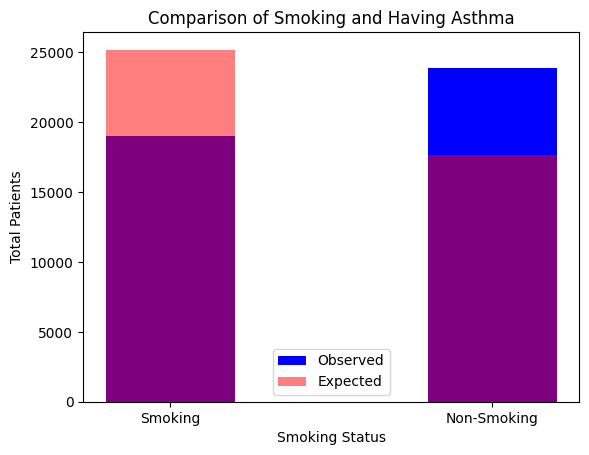

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['Asthma'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for graphs
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having Asthma')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['Stroke'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have stroke
smoking_stroke = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have stroke
percentage_smoking_stroke = (smoking_stroke / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have Stroke: {:.1f}%".format(percentage_smoking_stroke))

Chi-squared value: 1198.1399066366703
p-value: 1.547211104867963e-262
The percentage chance that someone who smokes will have Stroke: 5.2%


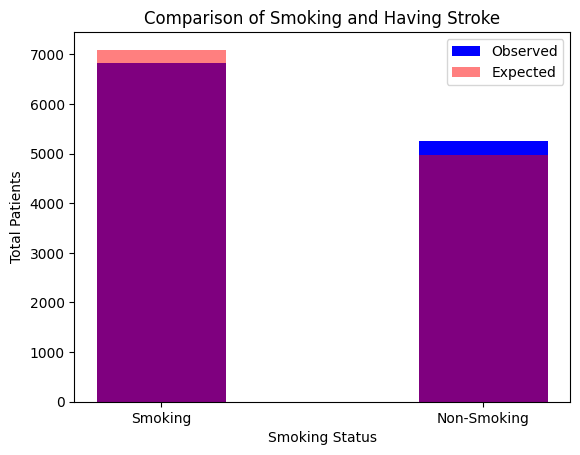

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['Stroke'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having Stroke')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['KidneyDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have KidneyDisease
smoking_Kidney = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have KidneyDisease
percentage_smoking_Kidney = (smoking_Kidney / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have KidneyDisease: {:.1f}%".format(percentage_smoking_Kidney))

Chi-squared value: 389.5765465508716
p-value: 1.0234431313386237e-86
The percentage chance that someone who smokes will have KidneyDisease: 4.5%


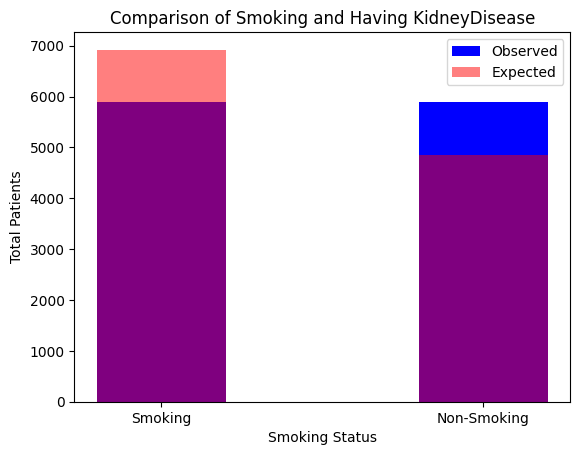

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['KidneyDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having KidneyDisease')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['HeartDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have HeartDisease
smoking_HeartDisease = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have HeartDisease
percentage_smoking_HeartDisease = (smoking_HeartDisease / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have HeartDisease: {:.1f}%".format(percentage_smoking_HeartDisease))

Chi-squared value: 3713.0331469808216
p-value: 0.0
The percentage chance that someone who smokes will have HeartDisease: 12.2%


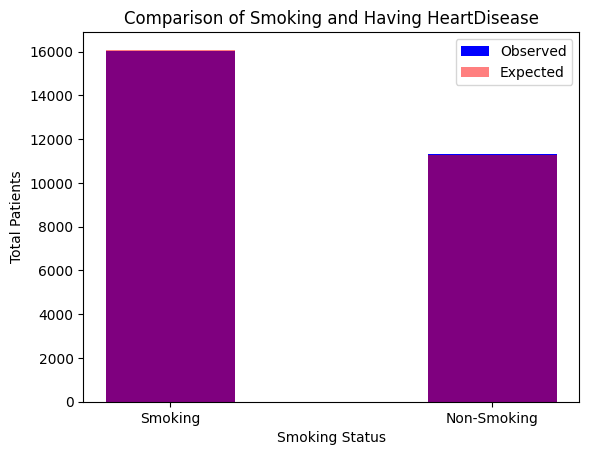

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['HeartDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having HeartDisease')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['DiffWalking'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have DiffWalking
smoking_DiffWalking = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have DiffWalking
percentage_smoking_DiffWalking = (smoking_DiffWalking / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have DiffWalking: {:.1f}%".format(percentage_smoking_DiffWalking))

Chi-squared value: 4610.036580098289
p-value: 0.0
The percentage chance that someone who smokes will have DiffWalking: 18.8%


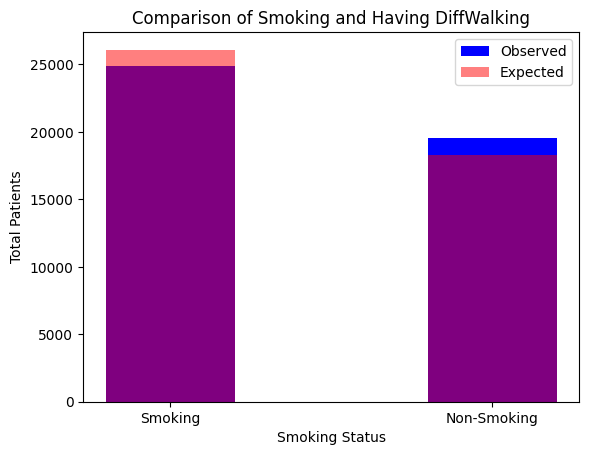

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['DiffWalking'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having DiffWalking')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['Diabetic'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have Diabetic
smoking_Diabetic = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have Diabetic
percentage_smoking_Diabetic = (smoking_Diabetic / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have Diabetic: {:.1f}%".format(percentage_smoking_Diabetic))

Chi-squared value: 1130.1761587010997
p-value: 1.0333852152926103e-244
The percentage chance that someone who smokes will have Diabetic: 15.1%


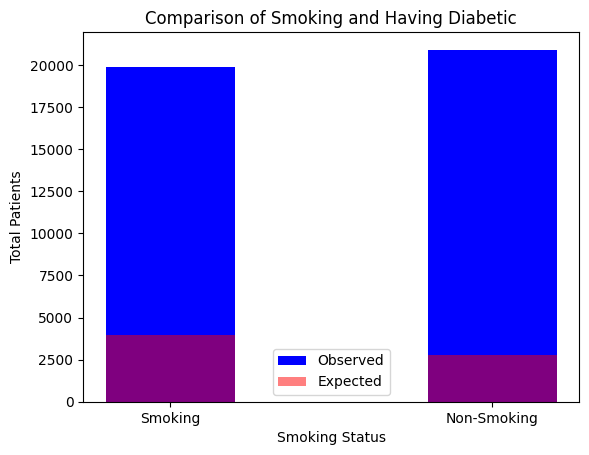

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['Diabetic'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having Diabetic')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['Smoking'], df['SkinCancer'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who smoke and have SkinCancer
smoking_SkinCancer = contingency_table.loc['Yes', 'Yes']

# Count the number of people who smoke
total_smoking = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who smokes will have SkinCancer
percentage_smoking_SkinCancer = (smoking_SkinCancer / total_smoking) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who smokes will have SkinCancer: {:.1f}%".format(percentage_smoking_SkinCancer))

Chi-squared value: 368.95411612857345
p-value: 3.1616682763263713e-82
The percentage chance that someone who smokes will have SkinCancer: 10.5%


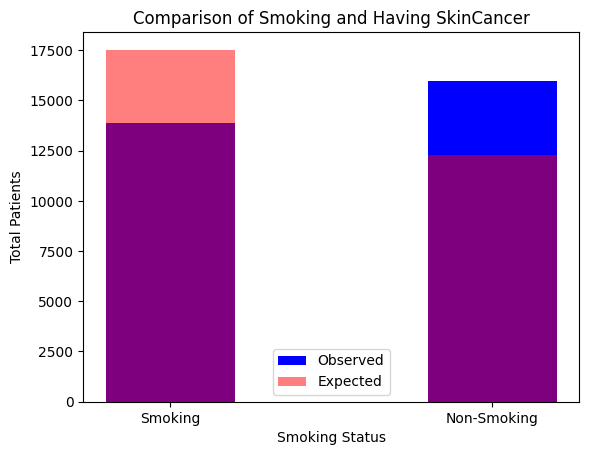

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['SkinCancer'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['Smoking', 'Non-Smoking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Smoking and Having SkinCancer')
plt.legend()
plt.show()

# 3. USING CHI-SQUARED TEST FOR ALCOHOL DRINKING AND ANY DISEASE

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['Asthma'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have asthma
alcoholic_asthma = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have asthma
percentage_alcoholic_asthma = (alcoholic_asthma / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have Asthma: {:.1f}%".format(percentage_alcoholic_asthma))

Chi-squared value: 1.5252142827462638
p-value: 0.21683211898201643
The percentage chance that someone who Alcoholic will have Asthma: 13.1%


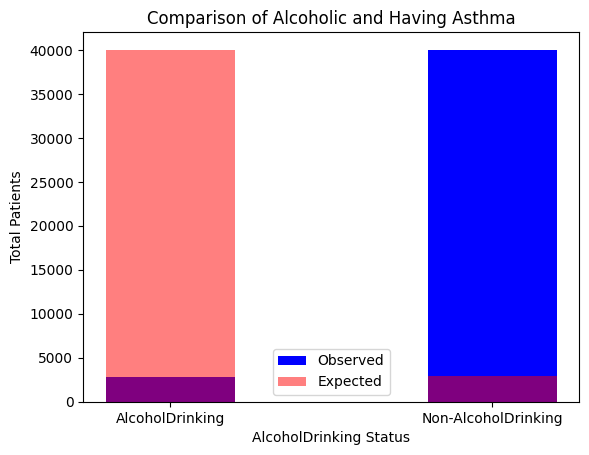

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['Asthma'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having Asthma')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['Stroke'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have Stroke
alcoholic_stroke = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have Stroke
percentage_alcoholic_stroke = (alcoholic_stroke / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have Stroke: {:.1f}%".format(percentage_alcoholic_stroke))

Chi-squared value: 125.69360706146239
p-value: 3.5881820788792606e-29
The percentage chance that someone who Alcoholic will have Stroke: 2.4%


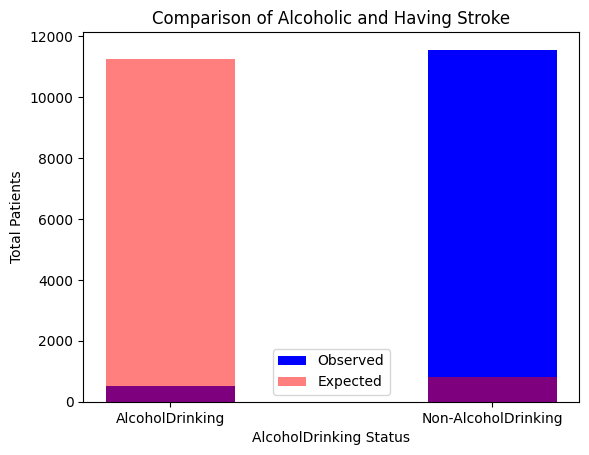

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['Stroke'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having Stroke')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['KidneyDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have KidneyDisease
alcoholic_Kidney = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have KidneyDisease
percentage_alcoholic_Kidney = (alcoholic_Kidney / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have KidneyDisease: {:.1f}%".format(percentage_alcoholic_Kidney))

Chi-squared value: 255.1647207150763
p-value: 1.9432514555590676e-57
The percentage chance that someone who Alcoholic will have KidneyDisease: 1.7%


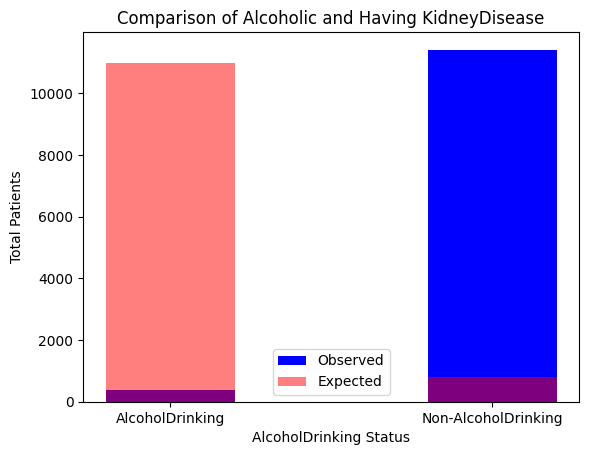

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['KidneyDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having KidneyDisease')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have HeartDisease
alcoholic_HeartDisease = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have HeartDisease
percentage_alcoholic_HeartDisease = (alcoholic_HeartDisease / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have HeartDisease: {:.1f}%".format(percentage_alcoholic_HeartDisease))

Chi-squared value: 328.64916890132054
p-value: 1.892352227090306e-73
The percentage chance that someone who Alcoholic will have HeartDisease: 5.2%


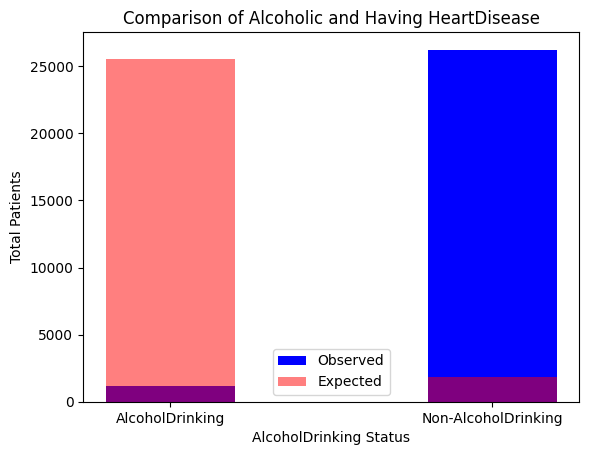

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having HeartDisease')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['DiffWalking'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have DiffWalking
alcoholic_DiffWalking = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have DiffWalking
percentage_alcoholic_DiffWalking = (alcoholic_DiffWalking / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have DiffWalking: {:.1f}%".format(percentage_smoking_DiffWalking))

Chi-squared value: 398.71091664245444
p-value: 1.0508797226814678e-88
The percentage chance that someone who Alcoholic will have DiffWalking: 18.8%


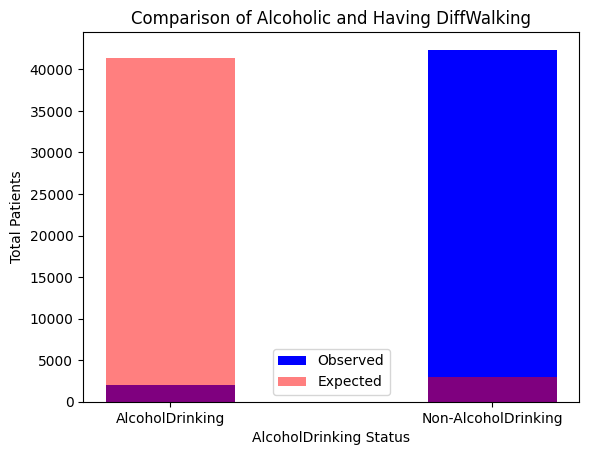

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['DiffWalking'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having DiffWalking')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['Diabetic'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have Diabetic
alcoholic_Diabetic = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have Diabetic
percentage_alcoholic_Diabetic = (alcoholic_Diabetic / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have Diabetic: {:.1f}%".format(percentage_alcoholic_Diabetic))

Chi-squared value: 1138.0378314511452
p-value: 2.0352807650103284e-246
The percentage chance that someone who Alcoholic will have Diabetic: 5.6%


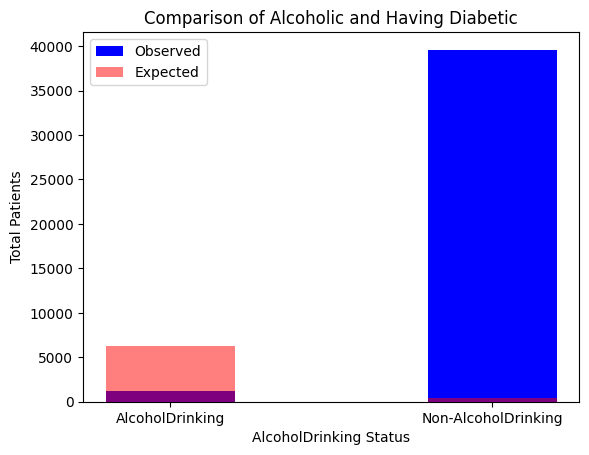

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['Diabetic'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having Diabetic')
plt.legend()
plt.show()

In [ ]:
# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['SkinCancer'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Count the number of people who alcoholic and have SkinCancer
alcoholic_SkinCancer = contingency_table.loc['Yes', 'Yes']

# Count the number of people who alcoholic
total_alcoholic = contingency_table.loc['Yes'].sum()

# Calculate the percentage chance that someone who alcoholic will have SkinCancer
percentage_alcoholic_SkinCancer = (alcoholic_SkinCancer / total_alcoholic) * 100

print("Chi-squared value:", chi2)
print("p-value:", p)
print("The percentage chance that someone who Alcoholic will have SkinCancer: {:.1f}%".format(percentage_alcoholic_SkinCancer))

Chi-squared value: 10.321080297805437
p-value: 0.0013151928301156257
The percentage chance that someone who Alcoholic will have SkinCancer: 8.7%


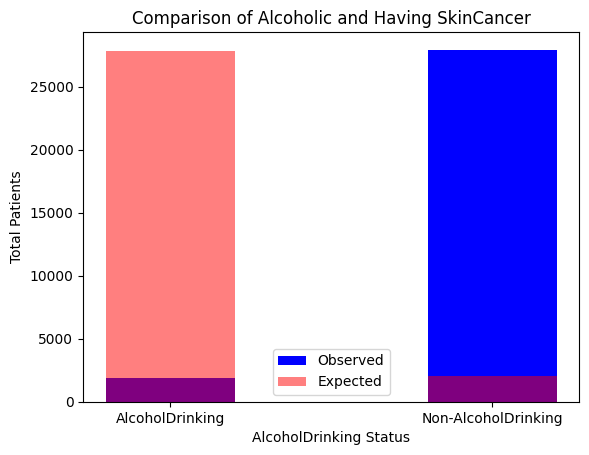

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['SkinCancer'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculating expected values
expected_values = chi2_contingency(contingency_table)[3]

# Data to be used for chart
categories = ['AlcoholDrinking', 'Non-AlcoholDrinking']
observed_counts = [contingency_table.loc['Yes', 'Yes'], contingency_table.loc['No', 'Yes']]
expected_counts = [expected_values[0, 1], expected_values[1, 1]]

# Create a bar chart
plt.bar(categories, observed_counts, label='Observed', color='blue', width=0.4)
plt.bar(categories, expected_counts, label='Expected', color='red', width=0.4, alpha=0.5)
plt.xlabel('AlcoholDrinking Status')
plt.ylabel('Total Patients')
plt.title('Comparison of Alcoholic and Having SkinCancer')
plt.legend()
plt.show()